### F24_MIE1624_Assignment_1

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator


In [40]:
df = pd.read_csv(
    filepath_or_buffer='/content/clean_kaggle_data_2024.csv',
    index_col=None
)

### Question 1. [3pts]

Perform exploratory data analysis to analyze the survey dataset and to summarize its main
characteristics. Present 3 graphical figures that represent different trends in the data

- Graph 1 - Education level vs. Salary

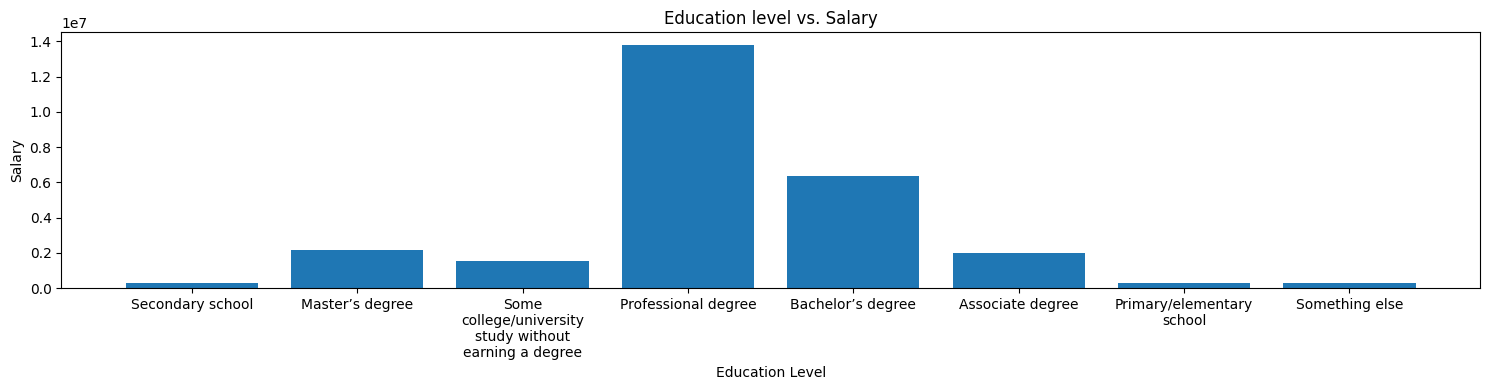

In [41]:
import textwrap
Education_Level = df.iloc[0 : , 7] #variable Education_Level is defined as the x-axis
Salary = df.iloc[0 : , -1] #variable Salary is defined as the y-axis

#Plot bar graph
wrapped_labels = ['\n'.join(textwrap.wrap(label, 20)) for label in Education_Level]
plt.figure(figsize=(15, 4))
plt.bar(wrapped_labels, Salary)

#Graph titles
plt.title('Education level vs. Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')

#Show the plot
plt.tight_layout()
plt.show()


- Graph 2: Age vs. Salary

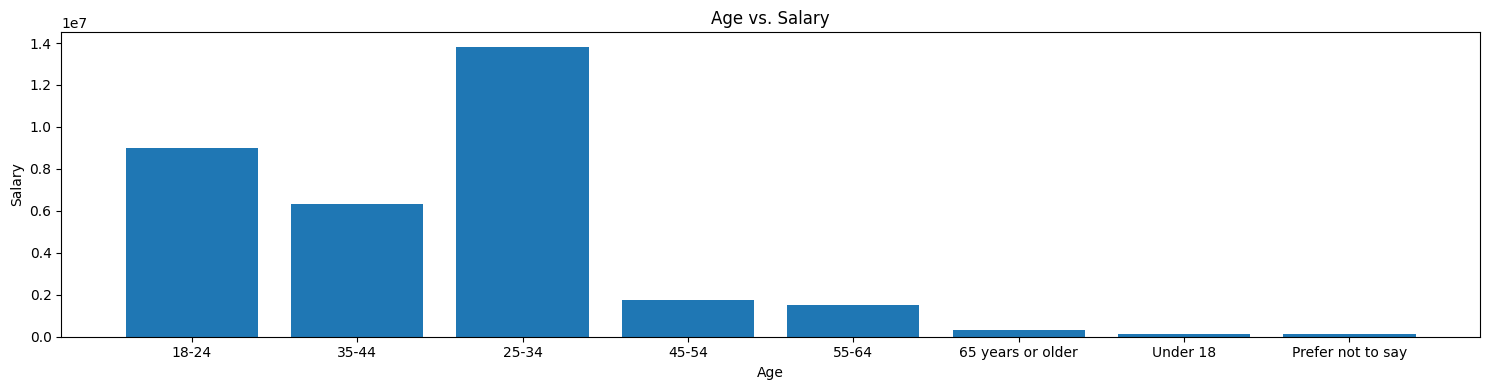

In [42]:
Age = df.iloc[0 : , 2] #variable Education_Level is defined as the x-axis
Remote_work = df.iloc[0 : , 4] #variable Salary is defined as the y-axis
wrapped_labels_Age = ['\n'.join(textwrap.wrap(label, 20)) for label in Age]
#Plot bar graph
plt.figure(figsize=(15, 4))
plt.bar(wrapped_labels_Age, Salary)

#tGraph titles
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')

#Show the plot
plt.tight_layout()
plt.show()


- Graph 3: Distribution of Job Satisfaction by Work Type

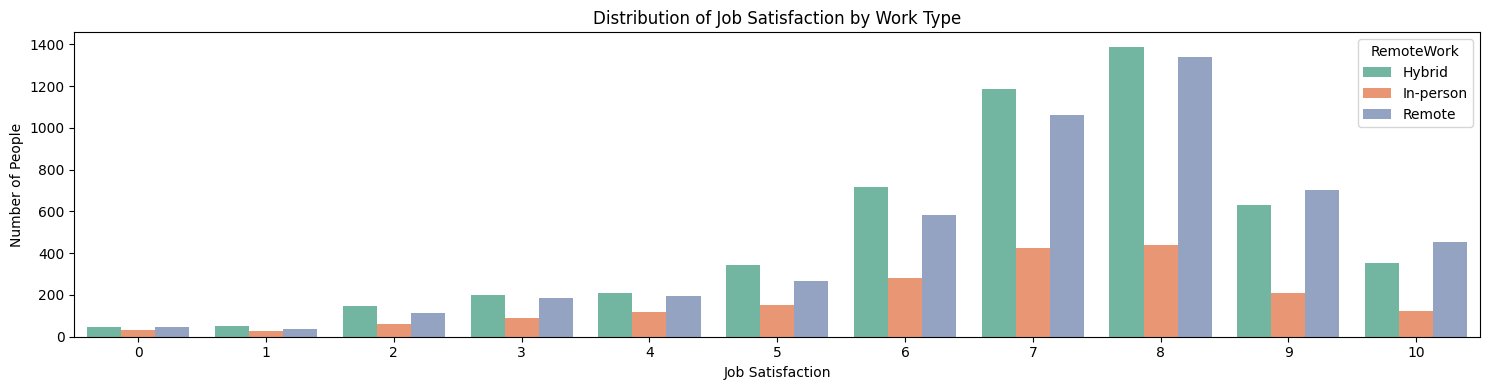

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example data

# Group the data to calculate the count of each work type per age group
grouped_data = df.groupby(['JobSat', 'RemoteWork']).size().reset_index(name='Count')

# Create a grouped bar chart
plt.figure(figsize=(15, 4))
sns.barplot(x='JobSat', y='Count', hue='RemoteWork', data=grouped_data, palette='Set2')

# Add titles and labels
plt.title('Distribution of Job Satisfaction by Work Type')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of People')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



### Question 2 [4pts]

-  a. [0.5pts] Compute and report descriptive statistics for the two groups of in-person and remote job modes (remove missing data and outlies, if necessary, and provide your rationale for your decision to either keep or remove such data.)

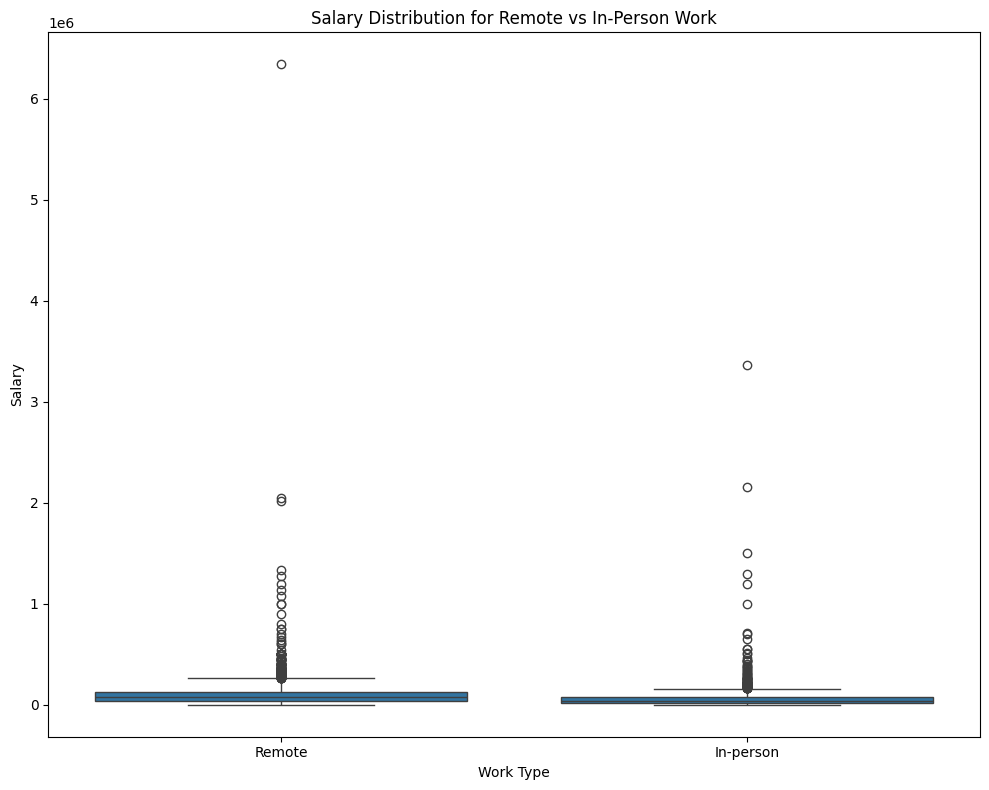

In [44]:
#Box Plot was plotted to check for any outliers. Looks like majority of the salaries for both remote work and in-person are below $400,000. Next we set a filter to look at salaries below $400,000.

plt.figure(figsize=(10, 8))
filtered_work_type = df[df['RemoteWork'].isin(['Remote', 'In-person'])]

sns.boxplot(x='RemoteWork', y='ConvertedCompYearly', data=filtered_work_type)

#titles and labels
plt.title('Salary Distribution for Remote vs In-Person Work')
plt.xlabel('Work Type')
plt.ylabel('Salary')


#Show the plot
plt.tight_layout()
plt.show()

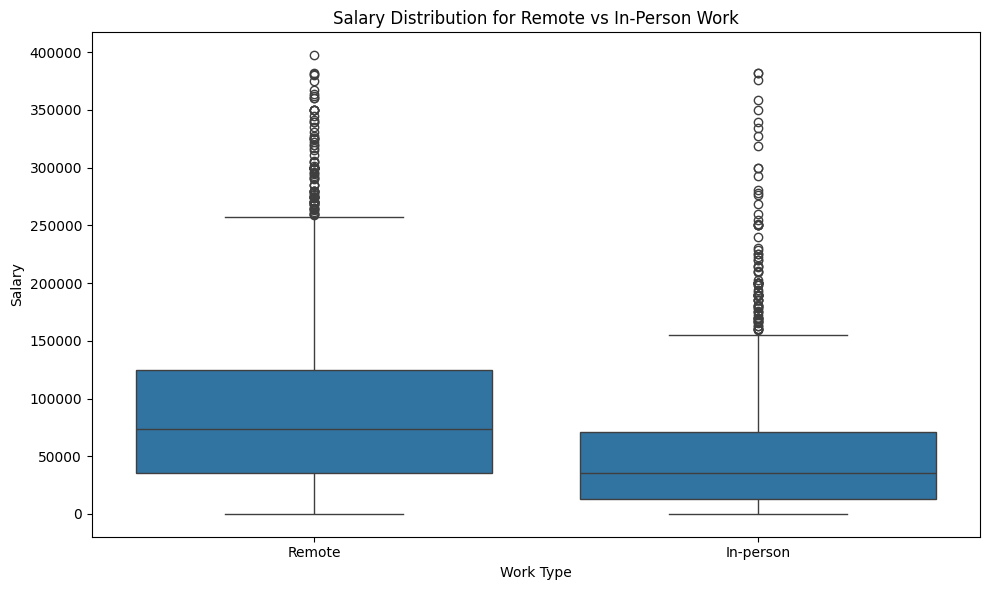

RemoteWork
In-person    382164
Remote       397403
Name: ConvertedCompYearly, dtype: int64


In [45]:
plt.figure(figsize=(10, 6))
filtered_work_type = df[df['RemoteWork'].isin(['Remote', 'In-person']) & (df['ConvertedCompYearly'] < 400000)]

sns.boxplot(x='RemoteWork', y='ConvertedCompYearly', data=filtered_work_type)

#titles and labels
plt.title('Salary Distribution for Remote vs In-Person Work')
plt.xlabel('Work Type')
plt.ylabel('Salary')

#Show the plot
plt.tight_layout()
plt.show()

max_values = filtered_work_type.groupby('RemoteWork')['ConvertedCompYearly'].max()
print(max_values)


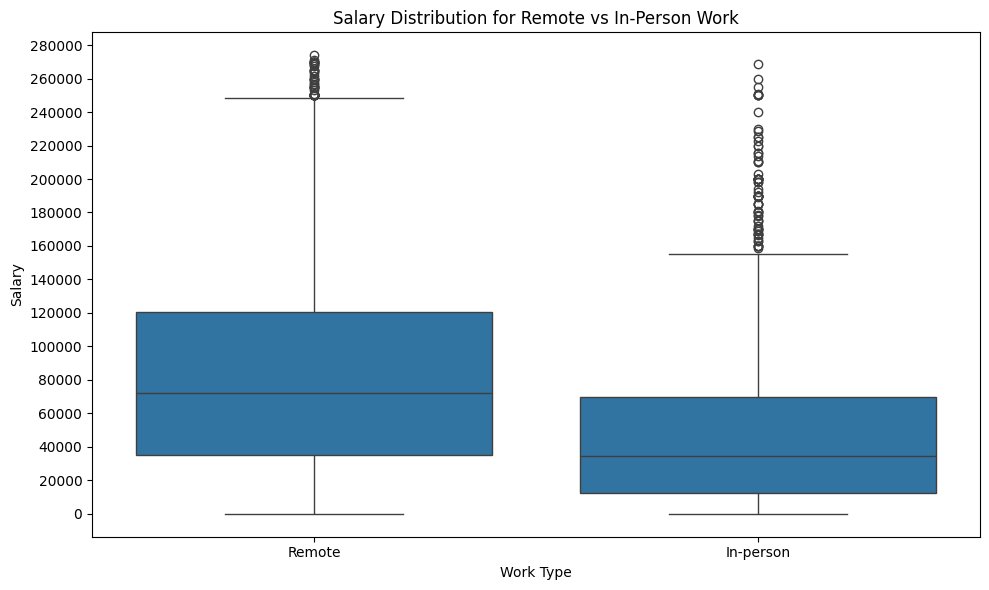

RemoteWork
In-person    268515
Remote       273884
Name: ConvertedCompYearly, dtype: int64


In [46]:
plt.figure(figsize=(10, 6))
filtered_work_type = df[df['RemoteWork'].isin(['Remote', 'In-person']) & (df['ConvertedCompYearly'] < 275000)]

sns.boxplot(x='RemoteWork', y='ConvertedCompYearly', data=filtered_work_type)

#titles and labels
plt.title('Salary Distribution for Remote vs In-Person Work')
plt.xlabel('Work Type')
plt.ylabel('Salary')
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(nbins=20))

#Show the plot
plt.tight_layout()
plt.show()

max_values = filtered_work_type.groupby('RemoteWork')['ConvertedCompYearly'].max()
print(max_values)

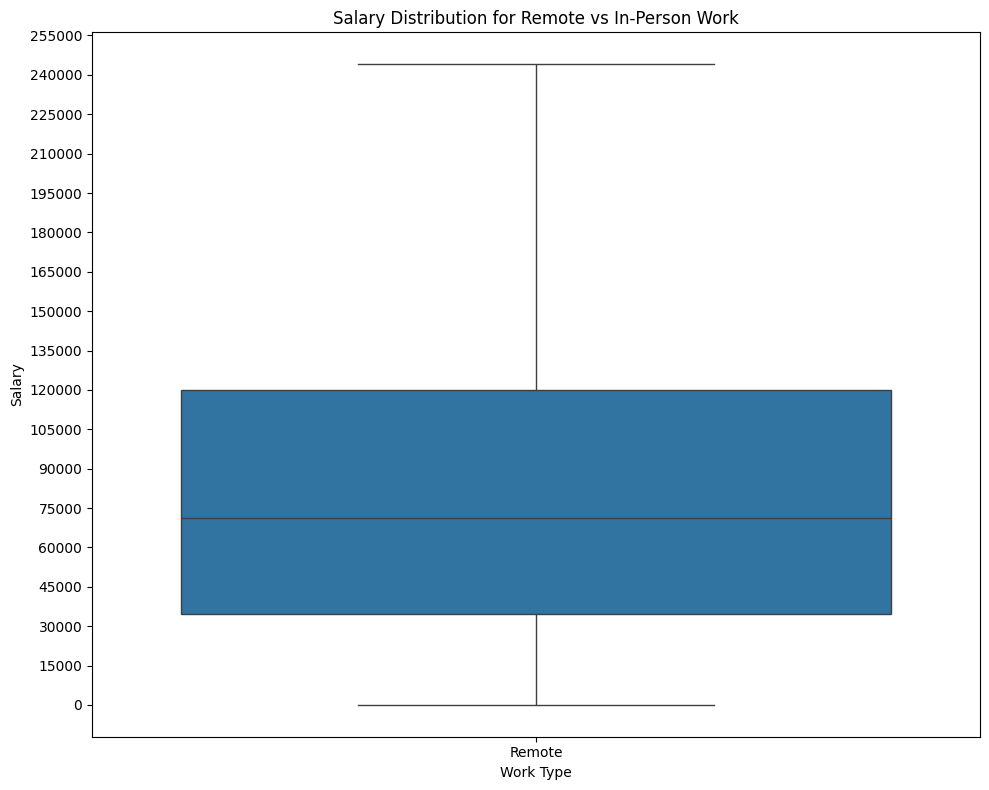

The general stat for remote jobs is: 
count      4808.000000
mean      81328.480241
std       58358.265362
min         104.000000
25%       34679.250000
50%       71381.000000
75%      120000.000000
max      244000.000000
Name: ConvertedCompYearly, dtype: float64



In [47]:
#Outliers were removed by removing all data points above the upper whisker
plt.figure(figsize=(10, 8))
filtered_work_type_remote = df[df['RemoteWork'].isin(['Remote']) & (df['ConvertedCompYearly'] < 248000)]

sns.boxplot(x='RemoteWork', y='ConvertedCompYearly', data=filtered_work_type_remote)

#titles and labels
plt.title('Salary Distribution for Remote vs In-Person Work')
plt.xlabel('Work Type')
plt.ylabel('Salary')
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(nbins=20))

#Show the plot
plt.tight_layout()
plt.show()

General_stat_remote = filtered_work_type_remote[filtered_work_type_remote['RemoteWork'] == 'Remote']['ConvertedCompYearly'].describe()
print(f'The general stat for remote jobs is: \n{General_stat_remote}\n')

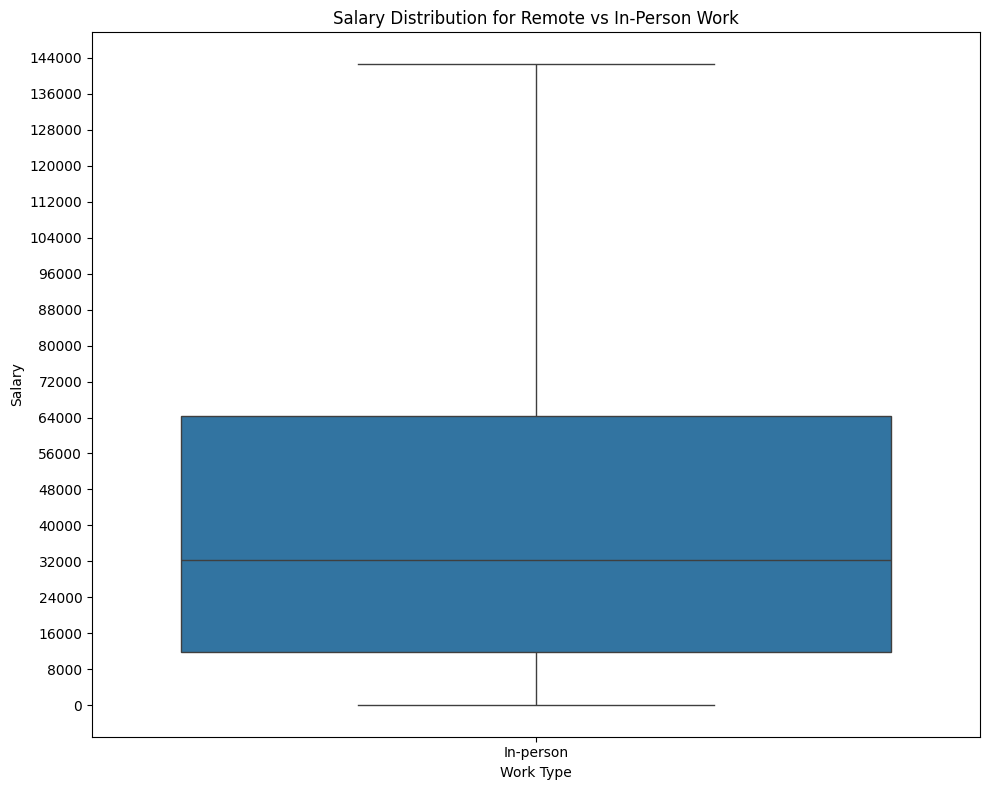

The general stat for remote jobs is: 
count      1820.000000
mean      41724.259890
std       35389.412252
min         123.000000
25%       11793.500000
50%       32222.000000
75%       64444.000000
max      142560.000000
Name: ConvertedCompYearly, dtype: float64



In [48]:
#Outliers were removed by removing all data points above the upper whisker
plt.figure(figsize=(10, 8))
filtered_work_type_inperson = df[df['RemoteWork'].isin(['In-person']) & (df['ConvertedCompYearly'] < 144000)]

sns.boxplot(x='RemoteWork', y='ConvertedCompYearly', data=filtered_work_type_inperson)

#titles and labels
plt.title('Salary Distribution for Remote vs In-Person Work')
plt.xlabel('Work Type')
plt.ylabel('Salary')
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(nbins=20))

#Show the plot
plt.tight_layout()
plt.show()

General_stat_inperson = filtered_work_type_inperson[filtered_work_type_inperson['RemoteWork'] == 'In-person']['ConvertedCompYearly'].describe()
print(f'The general stat for remote jobs is: \n{General_stat_inperson}\n')

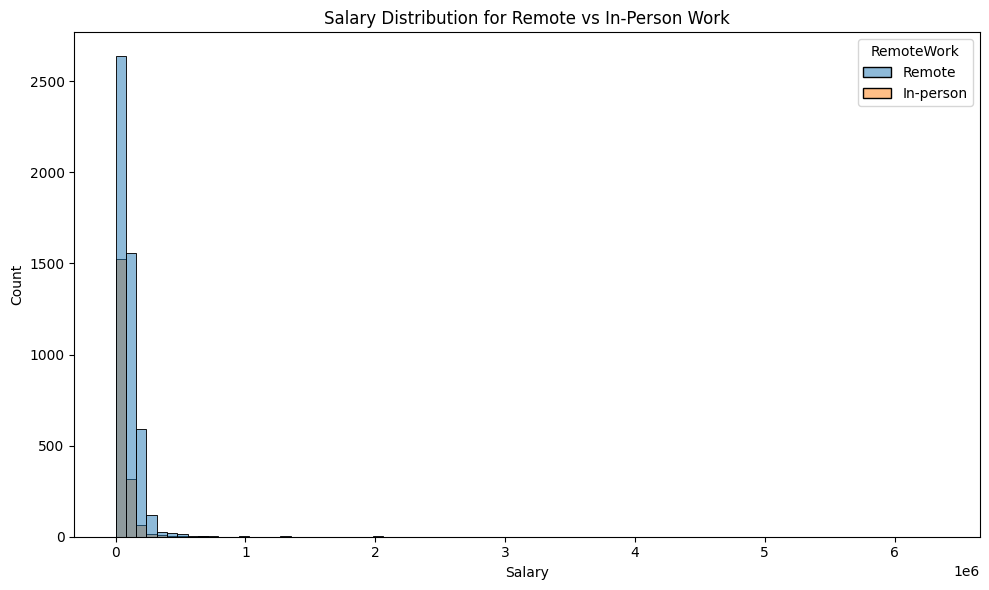

In [49]:
#histogram plot to visually see the distributions of the data. Both work types are skewed to the right without removing outliers.
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_work_type = df[df['RemoteWork'].isin(['Remote', 'In-person'])]

# Plot histogram for each work type
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_work_type, x='ConvertedCompYearly', hue='RemoteWork', bins=80)

# Titles and labels
plt.title('Salary Distribution for Remote vs In-Person Work')
plt.xlabel('Salary')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


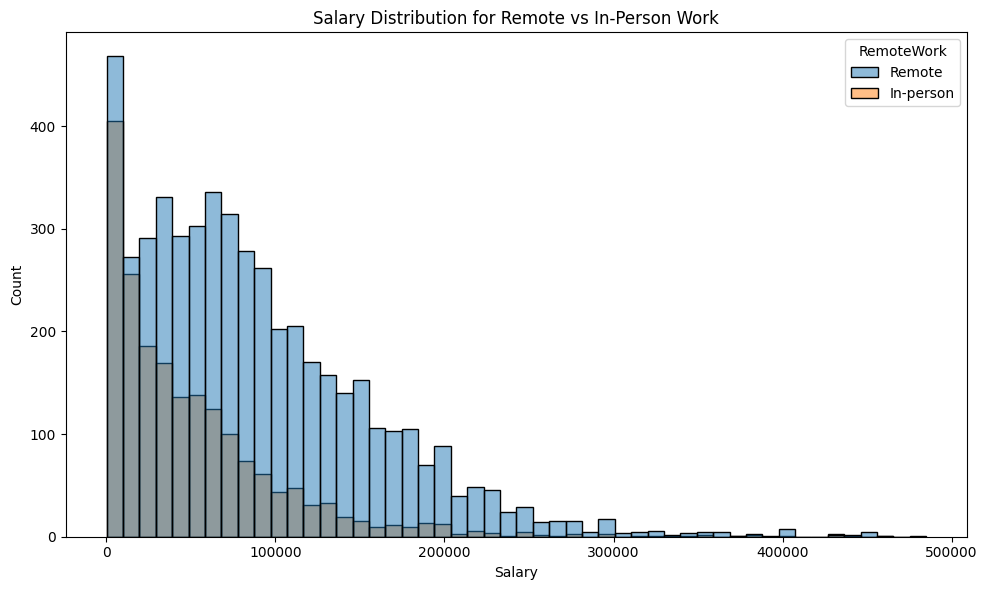

In [50]:
#Even after removing some outliers, the both work types are skewed to the right.
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_work_type = df[df['RemoteWork'].isin(['Remote', 'In-person']) & (df['ConvertedCompYearly'] < 500000)]

# Plot histogram for each work type
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_work_type, x='ConvertedCompYearly', hue='RemoteWork', bins=50)

# Titles and labels
plt.title('Salary Distribution for Remote vs In-Person Work')
plt.xlabel('Salary')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


In [51]:
General_stat_remote = filtered_work_type_remote[filtered_work_type_remote['RemoteWork'] == 'Remote']['ConvertedCompYearly'].describe()
print(f'The general stat for remote jobs is: \n{General_stat_remote}\n\n\n')

General_stat_inperson = filtered_work_type_inperson[filtered_work_type_inperson['RemoteWork'] == 'In-person']['ConvertedCompYearly'].describe()
print(f'The general stat for in-person jobs is: \n{General_stat_inperson}\n')

The general stat for remote jobs is: 
count      4808.000000
mean      81328.480241
std       58358.265362
min         104.000000
25%       34679.250000
50%       71381.000000
75%      120000.000000
max      244000.000000
Name: ConvertedCompYearly, dtype: float64



The general stat for in-person jobs is: 
count      1820.000000
mean      41724.259890
std       35389.412252
min         123.000000
25%       11793.500000
50%       32222.000000
75%       64444.000000
max      142560.000000
Name: ConvertedCompYearly, dtype: float64



-   b. [1.5pts] Perform a two-sample t-test to compare average salaries between in-person and
remote job modes.

-  Manual Calculation




In [52]:

remote_salaries =  np.array(filtered_work_type_remote['ConvertedCompYearly'])
in_person_salaries = np.array(filtered_work_type_inperson['ConvertedCompYearly'])

#Calculate means for both remote and inperson
remote_mean = np.mean(remote_salaries)
in_person_mean = np.mean(in_person_salaries)

#Calculate Variance for both remote and inperson
variance_remote = np.var(remote_salaries,ddof=1)
variance_in_person = np.var(in_person_salaries,ddof=1)

#Calculate length of each sample size
length_remote = len(remote_salaries)
length_in_person = len(in_person_salaries)


#Calculate the Pooled STD for the 2-groups.
pooled_std = np.sqrt(((length_in_person - 1) * variance_in_person + (length_remote - 1) * variance_remote) / (length_in_person + length_remote - 2))

#Calculate the Welch'S two sample t-test due to unequal var
t_test_1 = (remote_mean - in_person_mean) / np.sqrt((variance_remote / length_remote) + (variance_in_person / length_in_person))



#Degress of Freedom
df = ((variance_in_person / length_in_person) + (variance_remote / length_remote))**2 / \
     (((variance_in_person / length_in_person)**2 / (length_in_person - 1)) + ((variance_remote / length_remote)**2 / (length_remote - 1)))


Observed_mean_diff = remote_mean - in_person_mean

standard_error_3 = np.sqrt((variance_in_person / length_in_person) + (variance_remote / length_remote))

#Results
print(f'Mean Remote: {remote_mean}')
print(f'Mean In-Person: {in_person_mean}')
print(f'Variance Remote: {variance_remote}')
print(f'Variance In-Person: {variance_in_person}')
print(f'Pooled STD: {pooled_std}')
print(f't-test: {t_test_1}')
print(f'Degrees of Freedom: {df}')
print(f'length_remote: {length_remote}')
print(f'length_in_person: {length_in_person}')
print(f'Observed Mean Difference: {Observed_mean_diff}')
print(f'Standard Error: {standard_error_3}')

Mean Remote: 81328.48024126457
Mean In-Person: 41724.25989010989
Variance Remote: 3405687136.094471
Variance In-Person: 1252410499.5723321
Pooled STD: 53052.42434266219
t-test: 33.51389079084295
Degrees of Freedom: 5347.199580791731
length_remote: 4808
length_in_person: 1820
Observed Mean Difference: 39604.220351154676
Standard Error: 1181.7255298204825


- Python’s built-in function of two sample t-test

In [53]:
from scipy import stats

# Perform two-sample t-test using scipy
t_stat_scipy, p_value = stats.ttest_ind(in_person_salaries, remote_salaries, equal_var=False)

# Print the results from scipy
print(f"\nSciPy Calculation of Two-Sample t-Test:")
print(f"T-statistic: {t_stat_scipy}")
print(f"P-value: {p_value}")


SciPy Calculation of Two-Sample t-Test:
T-statistic: -33.51389079084295
P-value: 1.0826667870113532e-223


b. Check whether the assumptions required for the statistical testing are satisfied

In [54]:
# Perform Levene’s test for equality of variances.
stat_var, p_var = stats.levene(in_person_salaries, remote_salaries)

print(f"Levene's test for equality of variances: W={stat_var}, p={p_var}")

Levene's test for equality of variances: W=434.32295306538697, p=1.7620254554936682e-93


Levene's test showed that the the p value is smaller than 0.05 therefore, the variances across the 2 groups are not equal. This means Welch's two sample t-test must be used.

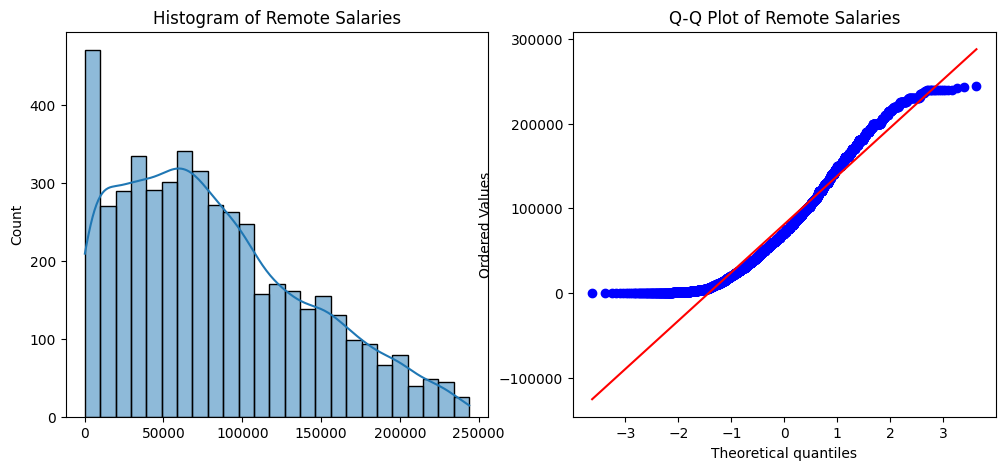

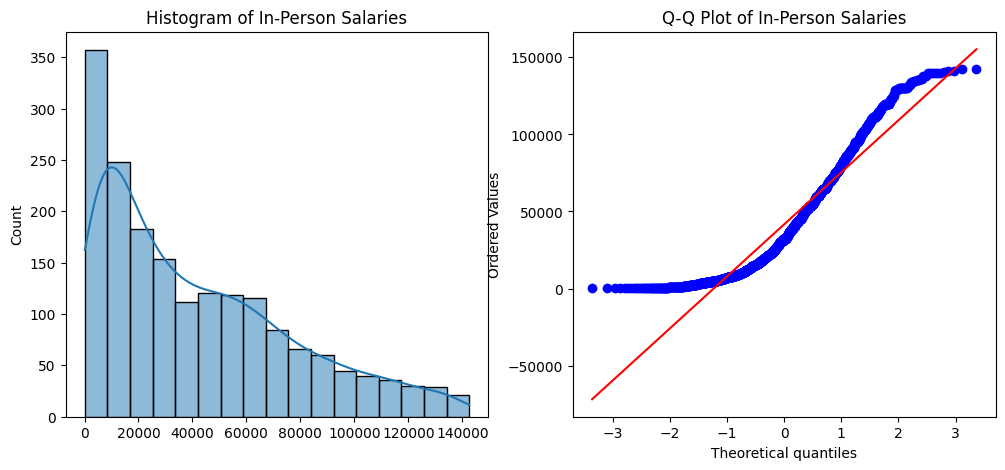

Shapiro-Wilk Test for Remote Salaries: ShapiroResult(statistic=0.9482853497859183, pvalue=3.7193818979929303e-38)
Shapiro-Wilk Test for In-Person Salaries: ShapiroResult(statistic=0.9050356688885886, pvalue=3.224070362711403e-32)


In [55]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#For Remote Salaries
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(remote_salaries, kde=True)
plt.title('Histogram of Remote Salaries')

plt.subplot(1, 2, 2)
stats.probplot(remote_salaries, dist="norm", plot=plt)
plt.title('Q-Q Plot of Remote Salaries')

plt.show()

#For In-Person Salaries
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(in_person_salaries, kde=True)
plt.title('Histogram of In-Person Salaries')

plt.subplot(1, 2, 2)
stats.probplot(in_person_salaries, dist="norm", plot=plt)
plt.title('Q-Q Plot of In-Person Salaries')

plt.show()

#Shapiro-Wilk Test
shapiro_remote = stats.shapiro(remote_salaries)
shapiro_in_person = stats.shapiro(in_person_salaries)

print('Shapiro-Wilk Test for Remote Salaries:', shapiro_remote)
print('Shapiro-Wilk Test for In-Person Salaries:', shapiro_in_person)


The histogram and Q-Q plots show that both sets of data are not normally distributed however, Central Limit Theorem applies here due to the large sample size.

c) Bootstrap your data for comparing the mean of salary for the two groups of in-person and remote workers. Note that the number of instances you sample from each group should be relative to its size. Use 10,000 replications. Present your findings in three distinct figures: one demonstrating the two bootstrapped distributions (for in-person and remote job modes), another depicting the distribution of the difference in means, and a third showcasing the normalized distribution of the difference in means.

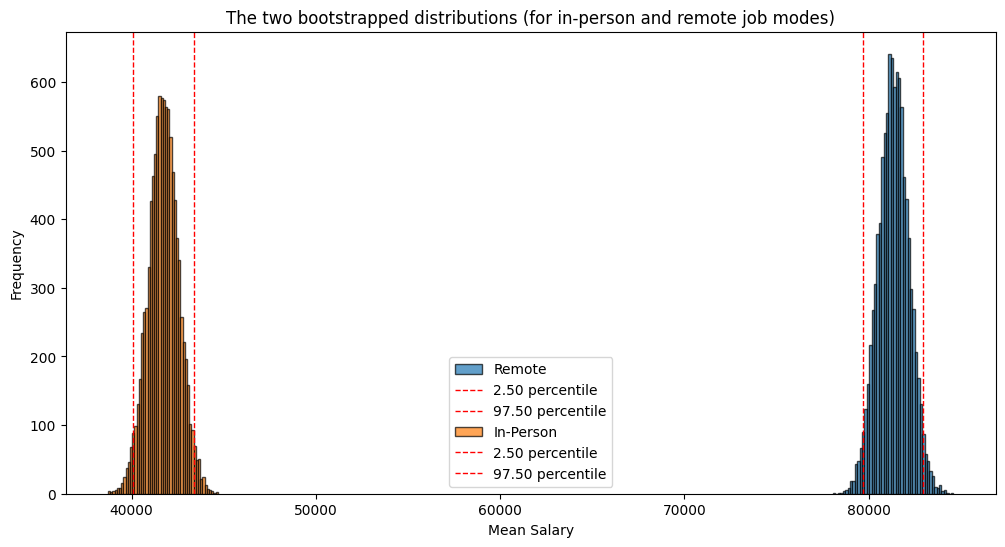

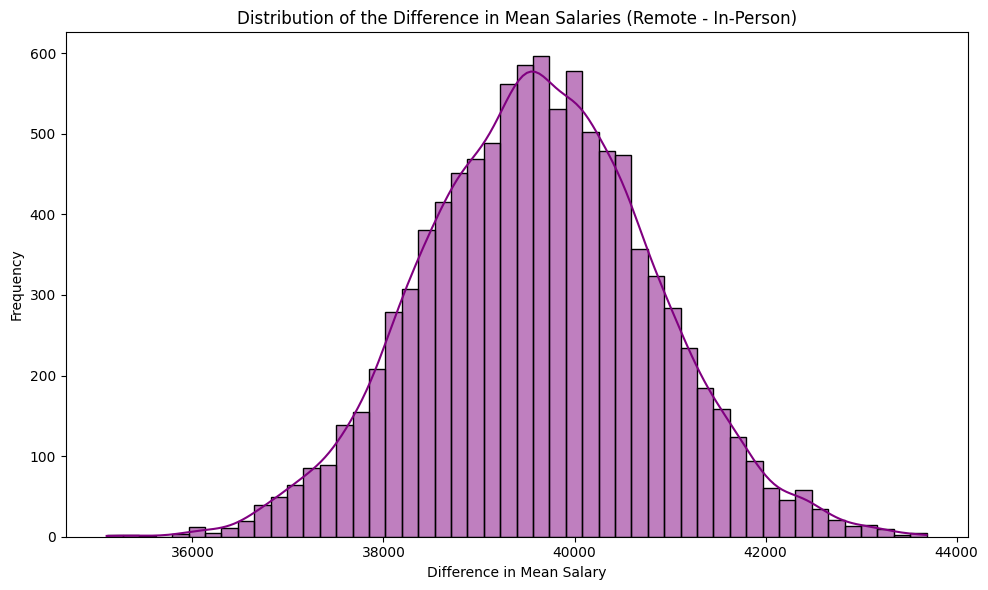

Mean of Normalized Differences: 33.03113524284118
T-value from Original Data: 33.51389079084295


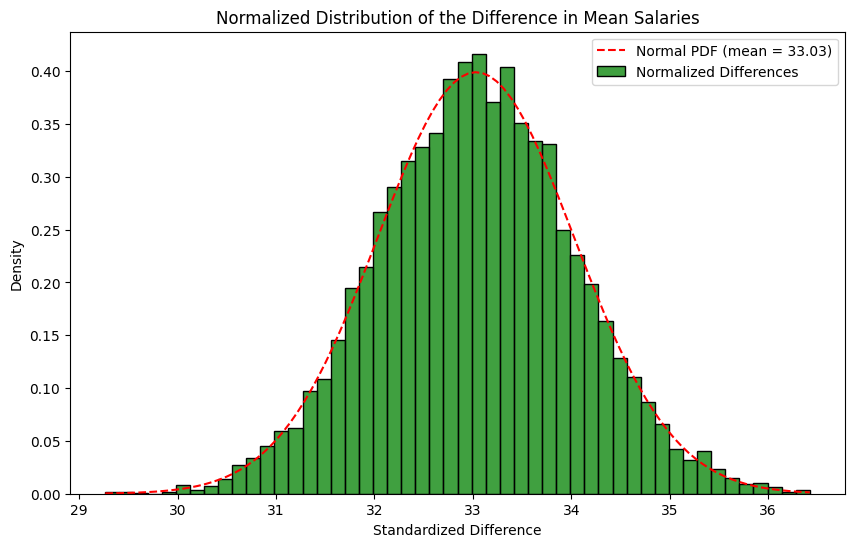

Bootstrap p-value: 0.0


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#Number of bootstrap replications
n_bootstraps = 10000

#Sample sizes
n_remote = len(remote_salaries)
n_in_person = len(in_person_salaries)

#Arrays to store bootstrap means
bootstrap_means_remote = np.empty(n_bootstraps)
bootstrap_means_in_person = np.empty(n_bootstraps)

#Step 2: Bootstrapping
for i in range(n_bootstraps):
    sample_remote = np.random.choice(remote_salaries, size=n_remote, replace=True)
    bootstrap_means_remote[i] = np.mean(sample_remote)

    sample_in_person = np.random.choice(in_person_salaries, size=n_in_person, replace=True)
    bootstrap_means_in_person[i] = np.mean(sample_in_person)

#Step 3: Calculate Confidence interval Remote
alpha = 0.05
lower_percentile = (alpha / 2) * 100
upper_percentile = (1 - alpha / 2) * 100
confidence_interval = np.percentile(bootstrap_means_remote, [lower_percentile, upper_percentile])

#Step 4: Calculate Confidence interval Inperson
alpha = 0.05
lower_percentile_1 = (alpha / 2) * 100
upper_percentile_1 = (1 - alpha / 2) * 100
confidence_interval_1 = np.percentile(bootstrap_means_in_person, [lower_percentile_1, upper_percentile_1])

#Step 5: Plot the bootstrap means and confidence interval
plt.figure(figsize=(12, 6))
plt.hist(bootstrap_means_remote, bins=50, edgecolor ='k',alpha=0.7, label= 'Remote')
plt.axvline(confidence_interval[0], color='r', linestyle='dashed', linewidth=1, label=f'{lower_percentile:.2f} percentile')
plt.axvline(confidence_interval[1], color='r', linestyle='dashed', linewidth=1, label=f'{upper_percentile:.2f} percentile')

plt.hist(bootstrap_means_in_person, bins=50, edgecolor ='k',alpha=0.7, label= 'In-Person' )
plt.axvline(confidence_interval_1[0], color='r', linestyle='dashed', linewidth=1, label=f'{lower_percentile_1:.2f} percentile')
plt.axvline(confidence_interval_1[1], color='r', linestyle='dashed', linewidth=1, label=f'{upper_percentile_1:.2f} percentile')

plt.title('The two bootstrapped distributions (for in-person and remote job modes)')
plt.xlabel('Mean Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#Difference in means
bootstrap_mean_differences = bootstrap_means_remote - bootstrap_means_in_person

#Figure 2: distribution of the difference in means
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_mean_differences, color='purple', bins=50, kde=True)
plt.title('Distribution of the Difference in Mean Salaries (Remote - In-Person)')
plt.xlabel('Difference in Mean Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#For normalized distribution of the difference in means

# Observed mean difference and standard error
observed_mean_difference = remote_mean - in_person_mean
standard_error = np.sqrt((variance_remote / length_remote) + (variance_in_person / length_in_person))

#Calculating the t-statistic
t_value = observed_mean_difference / standard_error

#Normalizing the differences without centering
normalized_differences = bootstrap_mean_differences / np.std(bootstrap_mean_differences)

#Mean of the normalized differences
mean_normalized_difference = np.mean(normalized_differences)
print(f'Mean of Normalized Differences: {mean_normalized_difference}')
print(f'T-value from Original Data: {t_test_1}')

#Figure 3: Normalized distribution of the difference in means
plt.figure(figsize=(10, 6))
sns.histplot(normalized_differences, color='green', kde=False, stat='density', bins=50, label='Normalized Differences')
x = np.linspace(min(normalized_differences), max(normalized_differences), 100)
y = norm.pdf(x, mean_normalized_difference, 1)
plt.plot(x, y, color='red', linestyle='--', label=f'Normal PDF (mean = {mean_normalized_difference:.2f})')
plt.title('Normalized Distribution of the Difference in Mean Salaries')
plt.xlabel('Standardized Difference')
plt.ylabel('Density')
plt.legend()
plt.show()

# Estimating the p-value
p_value_bootstrap = np.mean(bootstrap_mean_differences <= 0)
print(f'Bootstrap p-value: {p_value_bootstrap}')



d. [0.5pts] If appropriate, perform a two-sample t-test with a significance level of 0.05 threshold using bootstrapped distribution(s). Compare your results with those from 2.b and explain your reasoning.

In [57]:
from scipy import stats

#Perform two-sample t-test using scipy
t_stat_scipy, p_value = stats.ttest_ind(bootstrap_means_remote,bootstrap_means_in_person, equal_var=False)


#results from scipy
print(f"\nSciPy Calculation of Two-Sample t-Test:")
print(f"T-statistic: {t_stat_scipy}")
print(f"P-value: {p_value}")
print(f'T-stat on original data:{t_test_1}')


SciPy Calculation of Two-Sample t-Test:
T-statistic: 3362.040913251951
P-value: 0.0
T-stat on original data:33.51389079084295


## Question 3. [5pts]

-  Select the education level column from the cleaned dataset (“EdLevel”) and repeat steps a to d, but this time use Analysis of Variance (ANOVA) instead of a t-test for hypothesis testing to compare the mean salaries across three groups: Bachelor’s degree, Master’s degree, and *Professional* degree. [0.5pts for a; 1.5 pts for b; 2pts for c; 1pts for d]

a)

In [58]:
df = pd.read_csv(
    filepath_or_buffer='/content/clean_kaggle_data_2024.csv',
    index_col=None
)

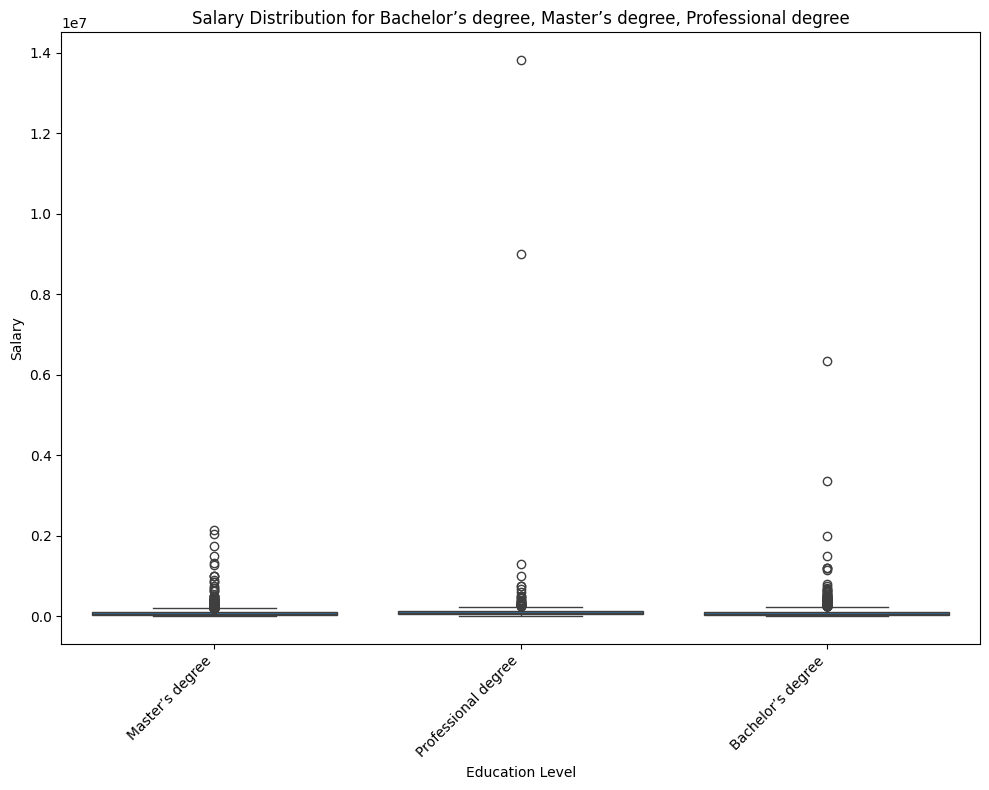

In [59]:
#Box Plot was plotted to check for any outliers. Next we set a filter to look at salaries below $500,000.

plt.figure(figsize=(10, 8))
filtered_education_type = df[df['EdLevel'].isin(['Bachelor’s degree', 'Master’s degree', 'Professional degree'])]

sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=filtered_education_type)

#titles and labels
plt.title('Salary Distribution for Bachelor’s degree, Master’s degree, Professional degree')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')

#Show the plot
plt.tight_layout()
plt.show()

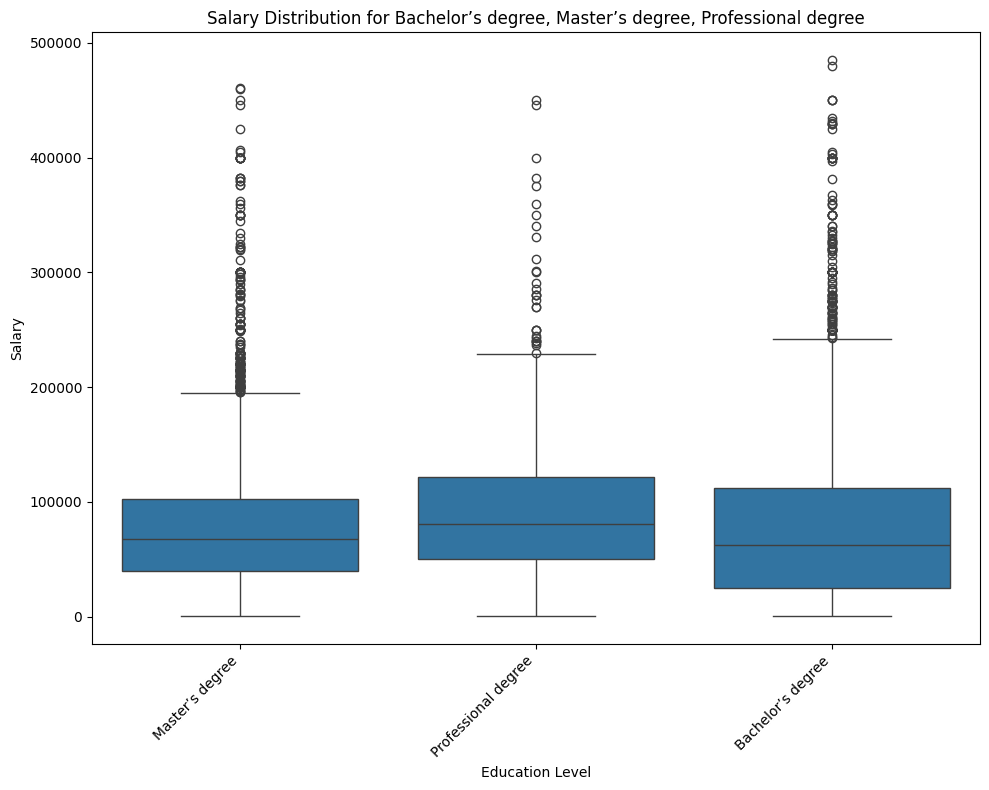

In [60]:
#Box Plot was plotted to check for any outliers. Next we set a filter to remove all data points above the upper whisker.

plt.figure(figsize=(10, 8))
filtered_education_type = df[df['EdLevel'].isin(['Bachelor’s degree', 'Master’s degree', 'Professional degree']) & (df['ConvertedCompYearly'] < 500000)]

sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=filtered_education_type)

#titles and labels
plt.title('Salary Distribution for Bachelor’s degree, Master’s degree, Professional degree')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')

#Show the plot
plt.tight_layout()
plt.show()

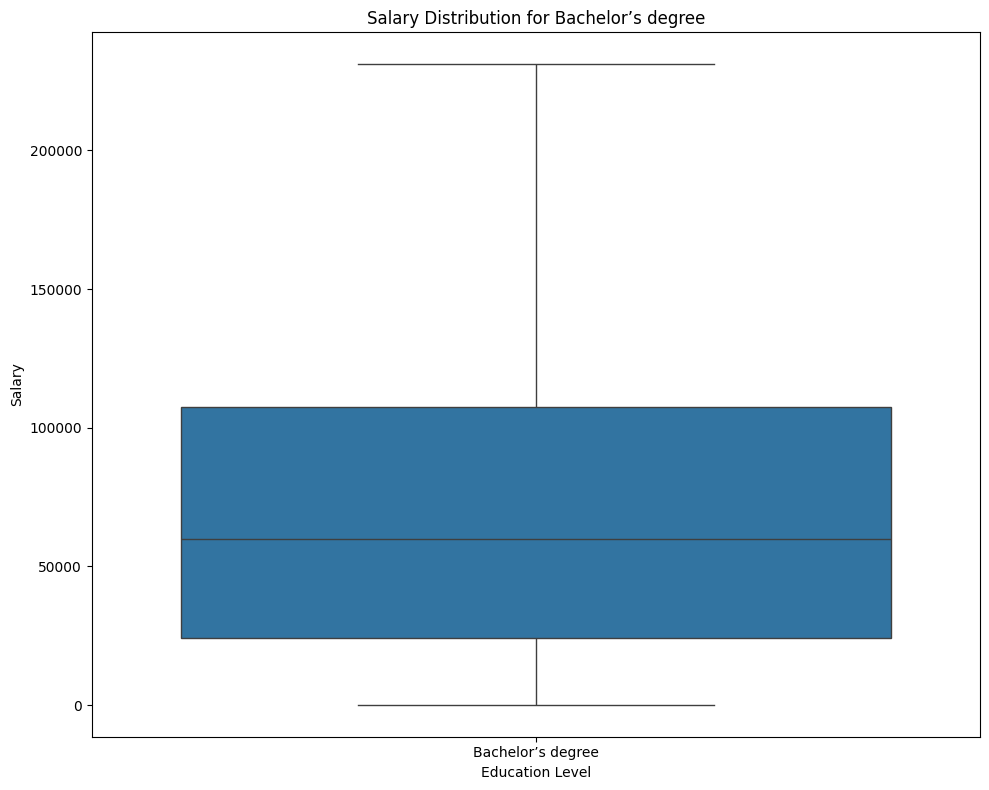

In [61]:
#Box Plot was plotted to check for any outliers. All data points above 234,000 were removed.

plt.figure(figsize=(10, 8))
filtered_education_type_bach = df[df['EdLevel'].isin(['Bachelor’s degree']) & (df['ConvertedCompYearly'] < 234000)]

sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=filtered_education_type_bach)

#titles and labels
plt.title('Salary Distribution for Bachelor’s degree')
plt.xlabel('Education Level')
plt.ylabel('Salary')

#Show the plot
plt.tight_layout()
plt.show()

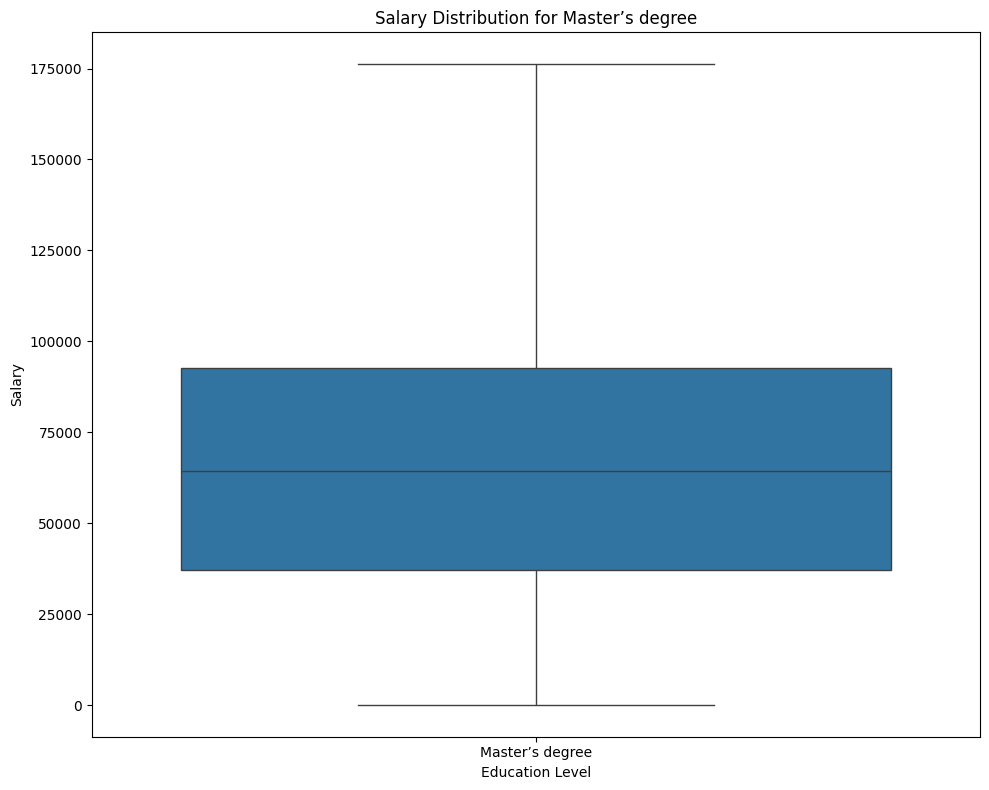

In [62]:
#Box Plot was plotted to check for any outliers. All data points above 177,000 were removed.

plt.figure(figsize=(10, 8))
filtered_education_type_mas = df[df['EdLevel'].isin(['Master’s degree']) & (df['ConvertedCompYearly'] < 177000)]

sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=filtered_education_type_mas)

#titles and labels
plt.title('Salary Distribution for Master’s degree')
plt.xlabel('Education Level')
plt.ylabel('Salary')

#Show the plot
plt.tight_layout()
plt.show()

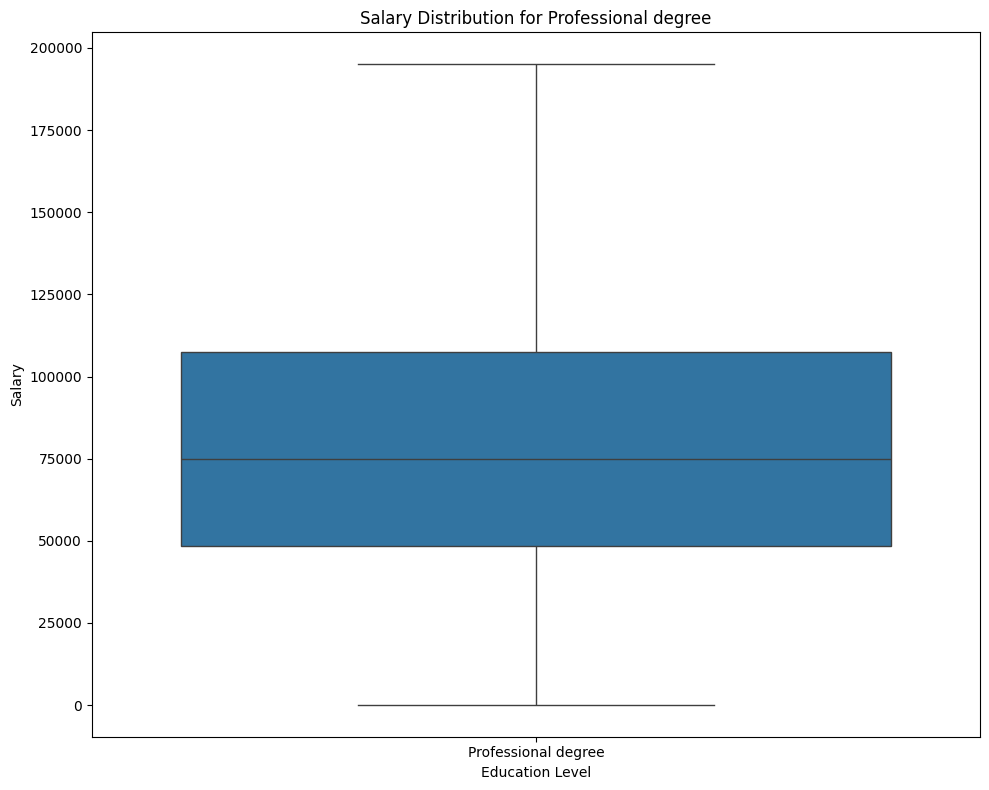

In [63]:
#Box Plot was plotted to check for any outliers. All data points above 198,000 were removed.

plt.figure(figsize=(10, 8))
filtered_education_type_pro = df[df['EdLevel'].isin(['Professional degree']) & (df['ConvertedCompYearly'] < 198000)]

sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=filtered_education_type_pro)

#titles and labels
plt.title('Salary Distribution for Professional degree')
plt.xlabel('Education Level')
plt.ylabel('Salary')


#Show the plot
plt.tight_layout()
plt.show()

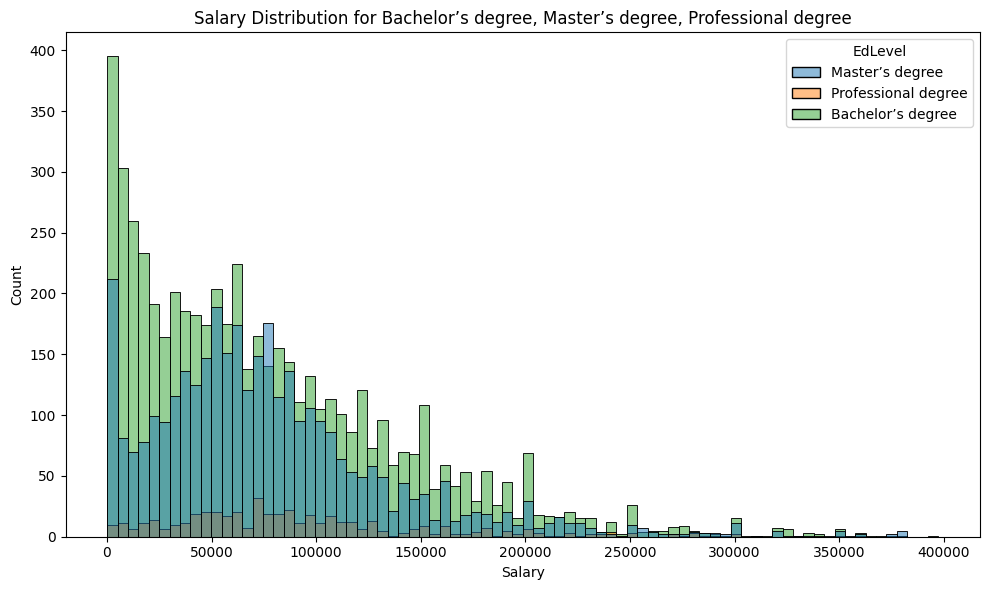

In [64]:
#Histogram plotted to show the distrubution of the 3 dgree types. Histogram shows the data being skewed to the right.

import seaborn as sns
import matplotlib.pyplot as plt

#Filter the data
filtered_education_type = df[df['EdLevel'].isin(['Bachelor’s degree', 'Master’s degree', 'Professional degree']) & (df['ConvertedCompYearly'] < 400000)]

#Plot histogram for each work type
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_education_type, x='ConvertedCompYearly', hue='EdLevel', bins=80)

#Titles and labels
plt.title('Salary Distribution for Bachelor’s degree, Master’s degree, Professional degree')
plt.xlabel('Salary')
plt.ylabel('Count')

#Show the plot
plt.tight_layout()
plt.show()


In [65]:
Stat_bach = filtered_education_type_bach['ConvertedCompYearly'].describe()
print(f'The general stat for Bachelor’s degree is: \n{Stat_bach}\n')

Stat_mas = filtered_education_type_mas['ConvertedCompYearly'].describe()
print(f'The general stat for Master’s degree is: \n{Stat_mas}\n')

Stat_pro = filtered_education_type_pro['ConvertedCompYearly'].describe()
print(f'The general stat for Professional degree is: \n{Stat_pro}\n')


The general stat for Bachelor’s degree is: 
count      5409.000000
mean      71399.921612
std       55691.047977
min         115.000000
25%       24033.000000
50%       60000.000000
75%      107406.000000
max      231000.000000
Name: ConvertedCompYearly, dtype: float64

The general stat for Master’s degree is: 
count      3261.000000
mean      67294.906777
std       41022.136878
min         104.000000
25%       37120.000000
50%       64444.000000
75%       92741.000000
max      176146.000000
Name: ConvertedCompYearly, dtype: float64

The general stat for Professional degree is: 
count       431.000000
mean      79493.709977
std       44809.876884
min         132.000000
25%       48333.000000
50%       75000.000000
75%      107406.000000
max      195000.000000
Name: ConvertedCompYearly, dtype: float64



b)

In [66]:
# Extract salaries for each education level
salaries_bach = filtered_education_type_bach['ConvertedCompYearly']
salaries_mas = filtered_education_type_mas['ConvertedCompYearly']
salaries_pro = filtered_education_type_pro['ConvertedCompYearly']


In [67]:
pip install pingouin

In [68]:
import pandas as pd
import pingouin as pg

# Create a dataframe to store all education levels and their corresponding salaries
data = pd.DataFrame({'ConvertedCompYearly': pd.concat([filtered_education_type_bach['ConvertedCompYearly'],filtered_education_type_mas['ConvertedCompYearly'],filtered_education_type_pro['ConvertedCompYearly']
    ]),'EdLevel': ['Bachelor’s degree'] * len(filtered_education_type_bach) + ['Master’s degree'] * len(filtered_education_type_mas) + ['Professional degree'] * len(filtered_education_type_pro)})

# Perform Welch's ANOVA
welch_anova_result = pg.welch_anova(dv='ConvertedCompYearly', between='EdLevel', data=data)

# Display the results
print(welch_anova_result)


    Source  ddof1       ddof2          F         p-unc       np2
0  EdLevel      2  1206.44433  18.387393  1.360649e-08  0.003122


In [69]:
from scipy.stats import levene
# Perform Levene's test
levene_stat, levene_p = levene(filtered_education_type_bach['ConvertedCompYearly'], filtered_education_type_mas['ConvertedCompYearly'], filtered_education_type_pro['ConvertedCompYearly'])

# Output the result
print(f"Levene's Test Statistic: {levene_stat}")
print(f"Levene's Test P-Value: {levene_p}")

Levene's Test Statistic: 157.2117723502514
Levene's Test P-Value: 7.53526277634583e-68


Levene's test shows that the P value is less than 0.05 therefore the variances are not equal. This means we must use Welch's ANOVA

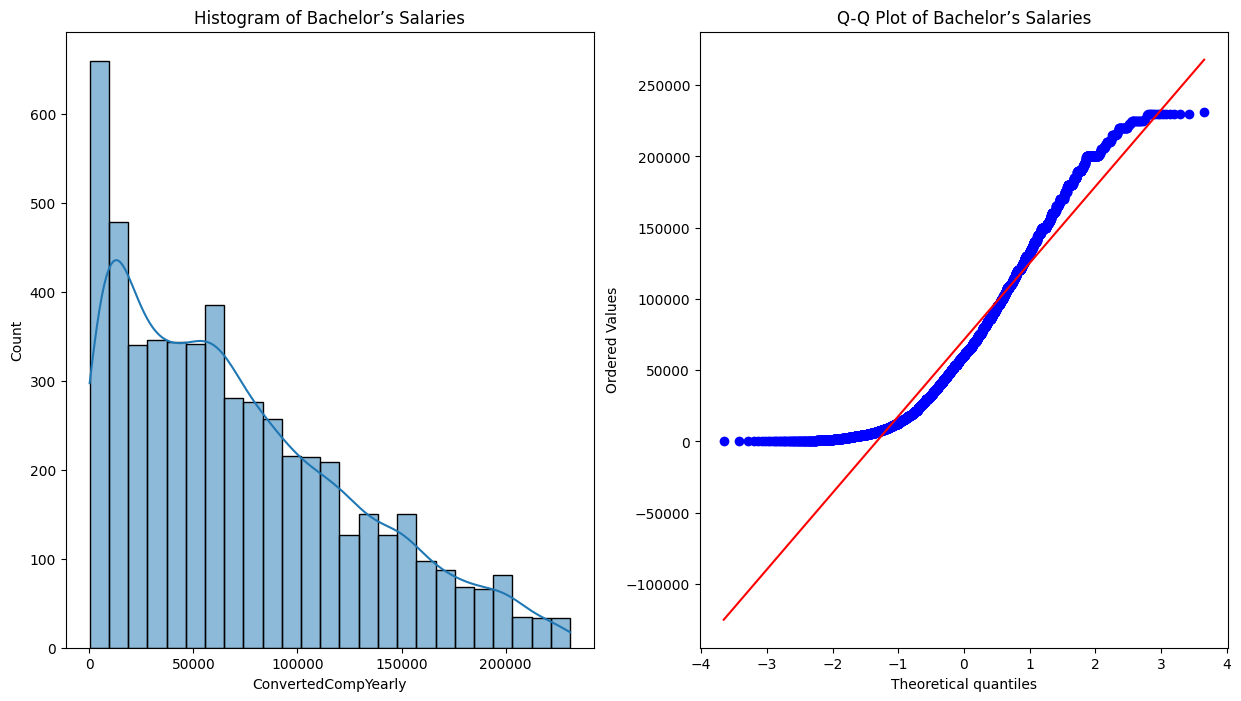

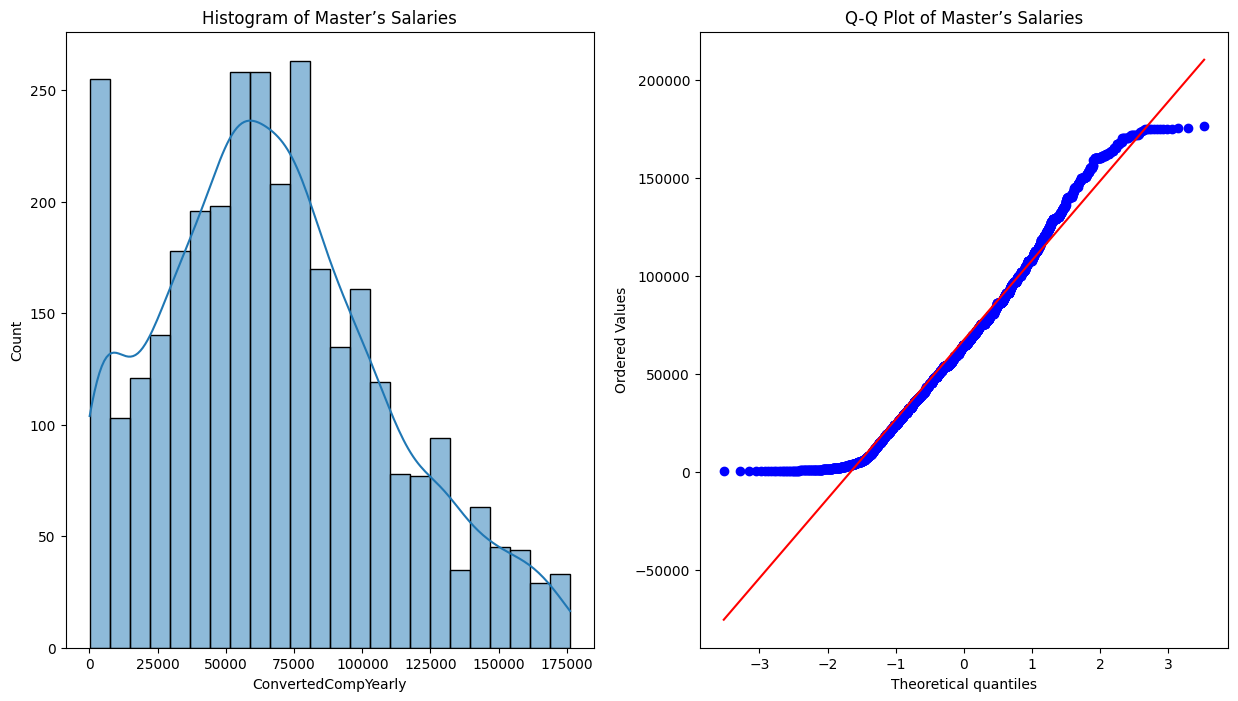

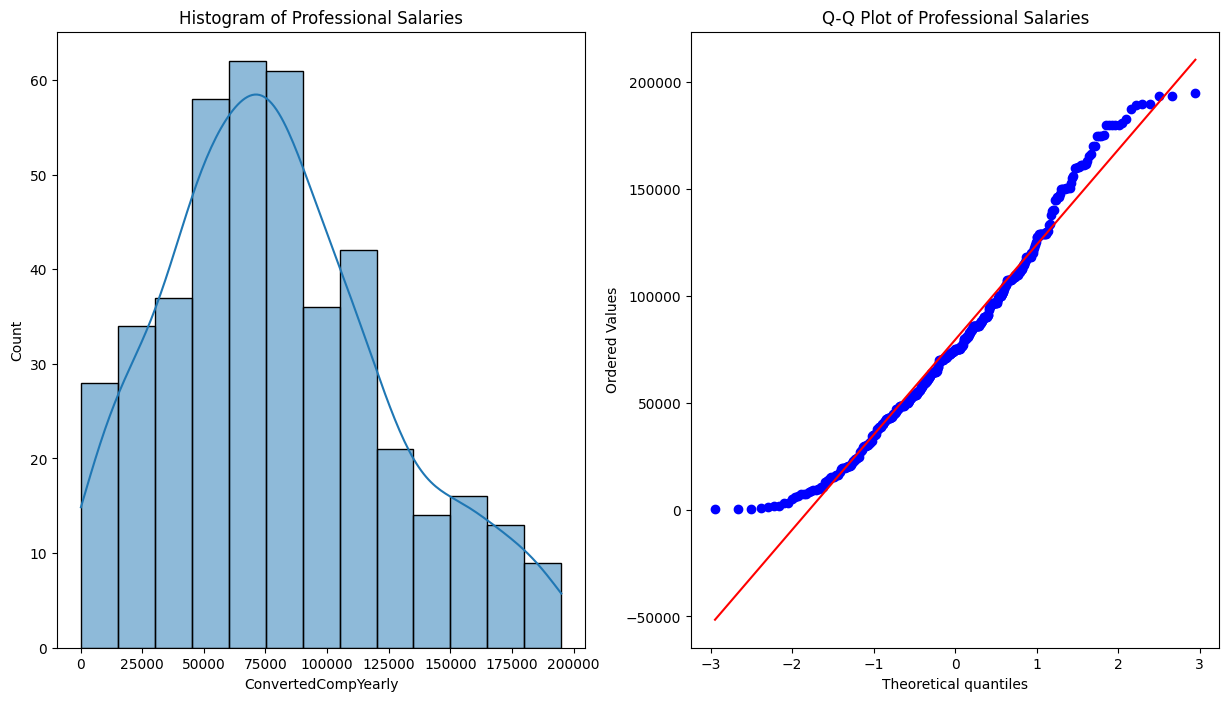

Shapiro-Wilk Test for Bachelor’s Salaries: ShapiroResult(statistic=0.9302300965488487, pvalue=1.162880906400537e-44)
Shapiro-Wilk Test for Master’s Salaries: ShapiroResult(statistic=0.9742942487585228, pvalue=8.446266658561548e-24)
Shapiro-Wilk Test for Professional Salaries: ShapiroResult(statistic=0.9736223201790056, pvalue=4.951250858297096e-07)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5409.
  res = hypotest_fun_out(*samples, **kwds)


In [70]:
# For Bachelor’s Salaries
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.histplot(filtered_education_type_bach['ConvertedCompYearly'], kde=True)
plt.title('Histogram of Bachelor’s Salaries')

plt.subplot(1, 2, 2)
stats.probplot(filtered_education_type_bach['ConvertedCompYearly'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Bachelor’s Salaries')

plt.show()

# For Master’s Salaries
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.histplot(filtered_education_type_mas['ConvertedCompYearly'], kde=True)
plt.title('Histogram of Master’s Salaries')

plt.subplot(1, 2, 2)
stats.probplot(filtered_education_type_mas['ConvertedCompYearly'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Master’s Salaries')

plt.show()

# For Professional Salaries
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.histplot(filtered_education_type_pro['ConvertedCompYearly'], kde=True)
plt.title('Histogram of Professional Salaries')

plt.subplot(1, 2, 2)
stats.probplot(filtered_education_type_pro['ConvertedCompYearly'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Professional Salaries')

plt.show()

# Shapiro-Wilk Test
shapiro_bachelors = stats.shapiro(filtered_education_type_bach['ConvertedCompYearly'])
shapiro_masters = stats.shapiro(filtered_education_type_mas['ConvertedCompYearly'])
shapiro_professional = stats.shapiro(filtered_education_type_pro['ConvertedCompYearly'])

print('Shapiro-Wilk Test for Bachelor’s Salaries:', shapiro_bachelors)
print('Shapiro-Wilk Test for Master’s Salaries:', shapiro_masters)
print('Shapiro-Wilk Test for Professional Salaries:', shapiro_professional)


The histogram and Q-Q plots show that all three sets of data are not normally distributed however, Central Limit Theorem applies here due to the large sample size.

c)

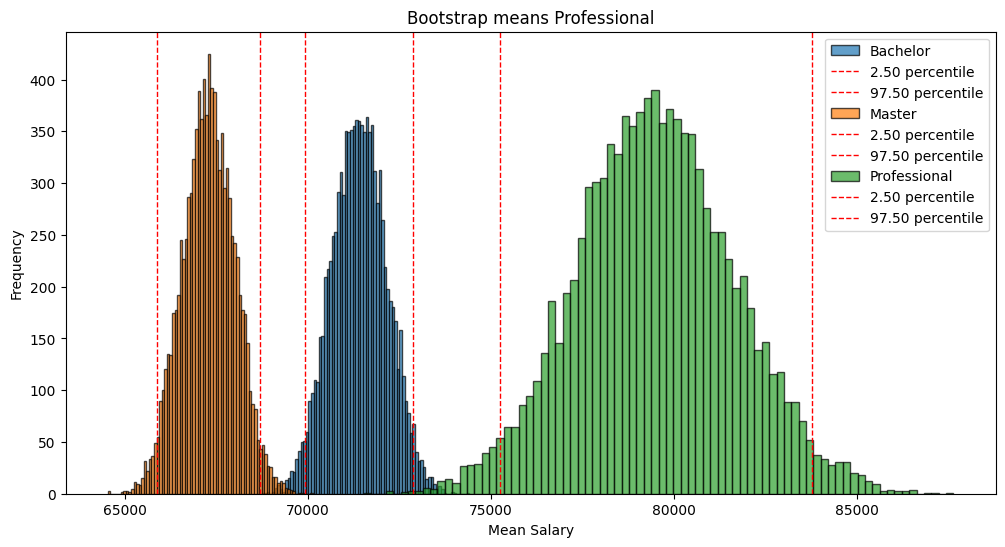

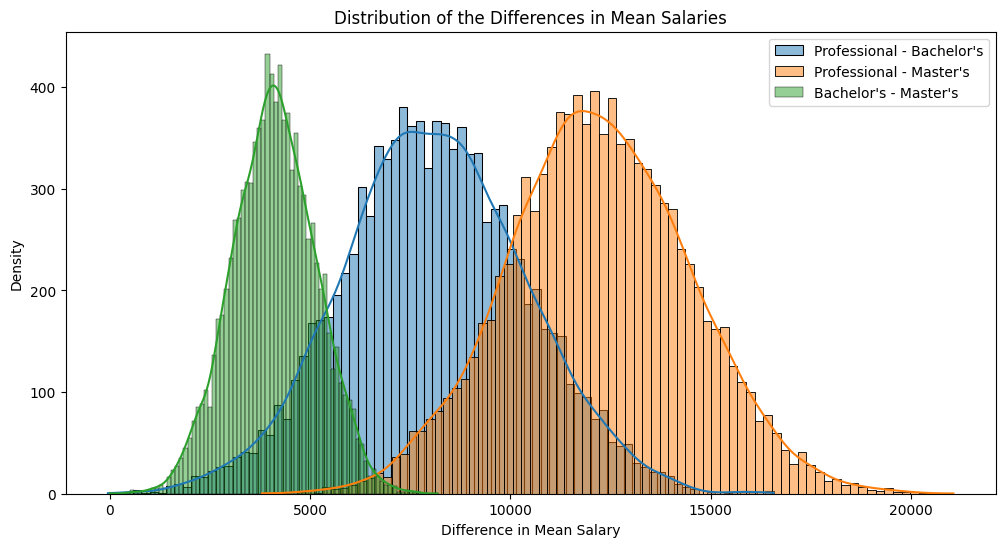

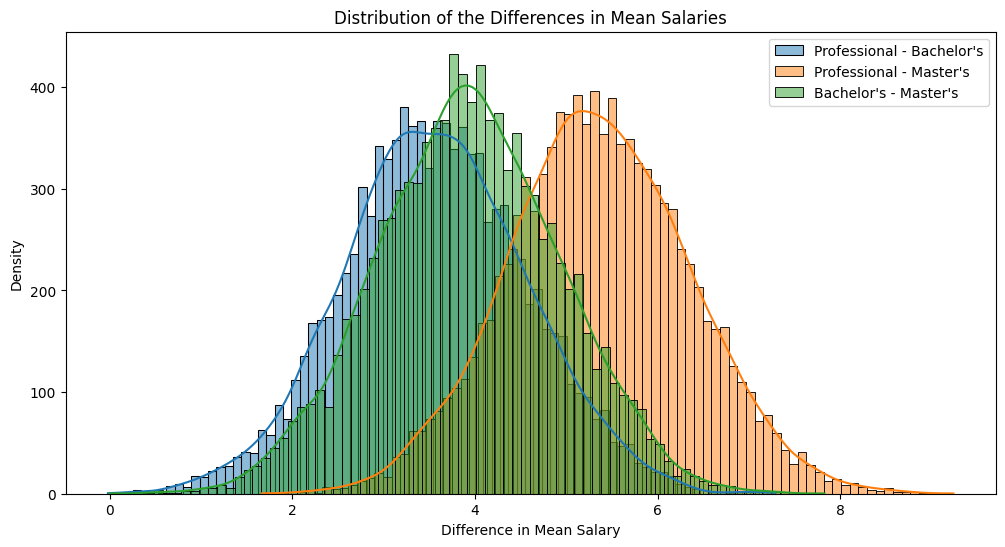

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Number of bootstrap replications
n_bootstraps = 10000

#arrays to store bootstrap means
bootstrap_means_bach = np.empty(n_bootstraps)
bootstrap_means_mas = np.empty(n_bootstraps)
bootstrap_means_pro = np.empty(n_bootstraps)

#Sample sizes
n_bach = len(salaries_bach)
n_mas = len(salaries_mas)
n_pro = len(salaries_pro)


#Perform bootstrapping for each group
for i in range(n_bootstraps):
    #Bootstrap sample for Bachelor's degree
    sample_bach = np.random.choice(salaries_bach, size=n_bach, replace=True)
    bootstrap_means_bach[i] = np.mean(sample_bach)

    #Bootstrap sample for Master's degree
    sample_mas = np.random.choice(salaries_mas, size=n_mas, replace=True)
    bootstrap_means_mas[i] = np.mean(sample_mas)

    #Bootstrap sample for Professional degree
    sample_pro = np.random.choice(salaries_pro, size=n_pro, replace=True)
    bootstrap_means_pro[i] = np.mean(sample_pro)

#Step 3: Calculate Confidence interval Bach
alpha = 0.05
lower_percentile = (alpha / 2) * 100
upper_percentile = (1 - alpha / 2) * 100
confidence_interval = np.percentile(bootstrap_means_bach, [lower_percentile, upper_percentile])

#Step 4: Calculate Confidence interval Mas
alpha = 0.05
lower_percentile_1 = (alpha / 2) * 100
upper_percentile_1 = (1 - alpha / 2) * 100
confidence_interval_1 = np.percentile(bootstrap_means_mas, [lower_percentile_1, upper_percentile_1])

#Step 5: Calculate Confidence interval Pro
alpha = 0.05
lower_percentile_2 = (alpha / 2) * 100
upper_percentile_2 = (1 - alpha / 2) * 100
confidence_interval_2 = np.percentile(bootstrap_means_pro, [lower_percentile_2, upper_percentile_2])



#Step 5: Plot the bootstrap means and confidence interval
plt.figure(figsize=(12, 6))
plt.hist(bootstrap_means_bach, bins=80, edgecolor ='k',alpha=0.7, label= 'Bachelor')
plt.axvline(confidence_interval[0], color='r', linestyle='dashed', linewidth=1, label=f'{lower_percentile:.2f} percentile')
plt.axvline(confidence_interval[1], color='r', linestyle='dashed', linewidth=1, label=f'{upper_percentile:.2f} percentile')
plt.title('Bootstrap means Bachelor')

plt.hist(bootstrap_means_mas, bins=80, edgecolor ='k',alpha=0.7, label= 'Master' )
plt.axvline(confidence_interval_1[0], color='r', linestyle='dashed', linewidth=1, label=f'{lower_percentile_1:.2f} percentile')
plt.axvline(confidence_interval_1[1], color='r', linestyle='dashed', linewidth=1, label=f'{upper_percentile_1:.2f} percentile')
plt.title('Bootstrap means Master')

plt.hist(bootstrap_means_pro, bins=80, edgecolor ='k',alpha=0.7, label= 'Professional' )
plt.axvline(confidence_interval_2[0], color='r', linestyle='dashed', linewidth=1, label=f'{lower_percentile_2:.2f} percentile')
plt.axvline(confidence_interval_2[1], color='r', linestyle='dashed', linewidth=1, label=f'{upper_percentile_2:.2f} percentile')
plt.title('Bootstrap means Professional')

plt.xlabel('Mean Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Calculate differences between each pair
bootstrap_diff_pro_bach = bootstrap_means_pro - bootstrap_means_bach
bootstrap_diff_pro_mas = bootstrap_means_pro - bootstrap_means_mas
bootstrap_diff_bach_mas = bootstrap_means_bach - bootstrap_means_mas

plt.figure(figsize=(12, 6))
sns.histplot(bootstrap_diff_pro_bach, kde=True, label="Professional - Bachelor's", alpha=0.5, bins = 80)
sns.histplot(bootstrap_diff_pro_mas, kde=True, label="Professional - Master's", alpha=0.5, bins = 80)
sns.histplot(bootstrap_diff_bach_mas, kde=True, label="Bachelor's - Master's", alpha=0.5, bins = 80)
plt.title('Distribution of the Differences in Mean Salaries')
plt.xlabel('Difference in Mean Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

#Normalize the differences
bootstrap_diff_pro_bach_norm = bootstrap_diff_pro_bach / np.std(bootstrap_diff_pro_bach)
bootstrap_diff_pro_mas_norm = bootstrap_diff_pro_mas / np.std(bootstrap_diff_pro_mas)
bootstrap_diff_bach_mas_norm = bootstrap_diff_bach_mas / np.std(bootstrap_diff_bach_mas)

#Plot the distributions with the new order
plt.figure(figsize=(12, 6))
sns.histplot(bootstrap_diff_pro_bach_norm, kde=True, label="Professional - Bachelor's", alpha=0.5, bins = 80)
sns.histplot(bootstrap_diff_pro_mas_norm, kde=True, label="Professional - Master's", alpha=0.5, bins = 80)
sns.histplot(bootstrap_diff_bach_mas_norm, kde=True, label="Bachelor's - Master's", alpha=0.5, bins = 80)
plt.title('Distribution of the Differences in Mean Salaries')
plt.xlabel('Difference in Mean Salary')
plt.ylabel('Density')
plt.legend()
plt.show()



In [72]:
#Observed mean differences
observed_diff_bach_mas = np.mean(salaries_bach) - np.mean(salaries_mas)
observed_diff_pro_bach = np.mean(salaries_pro) - np.mean(salaries_bach)
observed_diff_pro_mas =  np.mean(salaries_pro) - np.mean(salaries_mas)

#Sample sizes
n_bach = len(salaries_bach)
n_mas = len(salaries_mas)
n_pro = len(salaries_pro)

#Sample variances
var_bach = np.var(salaries_bach, ddof=1)
var_mas = np.var(salaries_mas, ddof=1)
var_pro = np.var(salaries_pro, ddof=1)

#Standard errors of the differences
se_bach_mas = np.sqrt((var_bach / n_bach) + (var_mas / n_mas))
se_bach_pro = np.sqrt((var_bach / n_bach) + (var_pro / n_pro))
se_mas_pro = np.sqrt((var_mas / n_mas) + (var_pro / n_pro))

#t-statistics
t_stat_bach_mas = observed_diff_bach_mas / se_bach_mas
t_stat_pro_bach = observed_diff_pro_bach / se_bach_pro
t_stat_pro_mas = observed_diff_pro_mas / se_mas_pro

#Normalized T-statstic
normalized_diff_bach_mas = bootstrap_diff_bach_mas / np.std(bootstrap_diff_bach_mas)
normalized_diff_pro_bach = bootstrap_diff_pro_bach / np.std(bootstrap_diff_pro_bach)
normalized_diff_pro_mas = bootstrap_diff_pro_mas / np.std(bootstrap_diff_pro_mas)

#Calculate the mean of the normalized differences
mean_normalized_bach_mas = np.mean(normalized_diff_bach_mas)
mean_normalized_pro_bach = np.mean(normalized_diff_pro_bach)
mean_normalized_pro_mas = np.mean(normalized_diff_pro_mas)

print(f"T-statistic Bachelor's - Master's: {t_stat_bach_mas:.4f}")
print(f"Mean of Normalized Differences Bachelor's - Master's: {mean_normalized_bach_mas:.4f}\n")

print(f"T-statistic Professional - Bachelor's: {t_stat_pro_bach:.4f}")
print(f"Mean of Normalized Differences Professional - Bachelor's: {mean_normalized_pro_bach:.4f}\n")

print(f"T-statistic Professional - Master's: {t_stat_pro_mas:.4f}")
print(f"Mean of Normalized Differences Professional - Master's: {mean_normalized_pro_mas:.4f}")


T-statistic Bachelor's - Master's: 3.9329
Mean of Normalized Differences Bachelor's - Master's: 3.9295

T-statistic Professional - Bachelor's: 3.5384
Mean of Normalized Differences Professional - Bachelor's: 3.5607

T-statistic Professional - Master's: 5.3625
Mean of Normalized Differences Professional - Master's: 5.3540


T-values of the normalized diff are roughly equal to the original t-value therefore, normalized plot of the pairwise distributions are correct.

d)

In [73]:
import pandas as pd
import pingouin as pg

# Step 1: Combine the bootstrapped distributions into a single dataframe
bootstrap_data = pd.DataFrame({'ConvertedCompYearly': np.concatenate([bootstrap_means_bach, bootstrap_means_mas, bootstrap_means_pro]),
                               'EdLevel': ['Bachelor’s degree'] * len(bootstrap_means_bach) + ['Master’s degree'] * len(bootstrap_means_mas) +['Professional degree'] * len(bootstrap_means_pro)})

# Step 2: Perform Welch's ANOVA on the bootstrapped distributions
welch_anova_bootstrap = pg.welch_anova(dv='ConvertedCompYearly', between='EdLevel', data=bootstrap_data)


print(f'Welch ANOVA on original data \n{welch_anova_result}\n\n')

print(f'Welch ANOVA on bootstrapped data \n{welch_anova_bootstrap}\n')



Welch ANOVA on original data 
    Source  ddof1       ddof2          F         p-unc       np2
0  EdLevel      2  1206.44433  18.387393  1.360649e-08  0.003122


Welch ANOVA on bootstrapped data 
    Source  ddof1         ddof2              F  p-unc       np2
0  EdLevel      2  18387.698381  183599.640971    0.0  0.930646

